In [4]:
import jax.numpy as jnp
from jax import grad, vmap, jit, random, lax


In [5]:
from numpy.random import seed
from numpy.random import normal
import matplotlib.pyplot as plt
import scipy.stats

In [6]:
#generate data (3 gausiana n1 = 50, n2 = 500 y n3 = 5000)

seed(56) 
# always the same seed to get the same results

data1 = normal(loc=1, scale=2, size=50) # loc = media, scale = varianza
data2 = normal(loc=2, scale=1, size=500)
data3 = normal(loc=3, scale=0.5, size=5000)

#find mean of sample
media1 = jnp.mean(data1)
media2 = jnp.mean(data2)
media3 = jnp.mean(data3)
print (media1)
print (media2)
print (media3)

#find standard deviation of sample
var1 = jnp.std(data1, ddof=1)
var2 = jnp.std(data2, ddof=1)
var3 = jnp.std(data3, ddof=1)
print (var1)
print (var2)
print (var3)


0.91970116
2.0279765
3.0028834
1.8900409
0.9861963
0.50449497


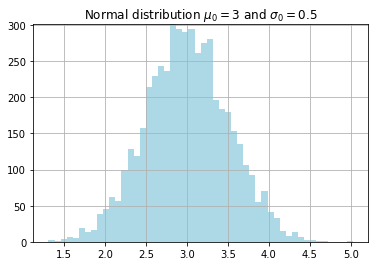

In [7]:
#grafico muestra3
hx, hy, _ = plt.hist(data3, bins=50, color="lightblue")

plt.ylim(0.0,max(hx)+0.05)
plt.title(r'Normal distribution $\mu_0 = 3$ and $\sigma_0 = 0.5$')
plt.grid()

#plt.savefig("likelihood_normal_distribution_01.png", bbox_inches='tight')
#plt.show()
#plt.close()

-7745.292


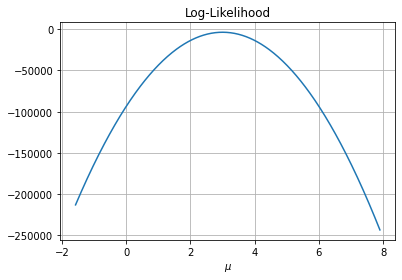

In [8]:
#log likuhood (copiado)
scipy.stats.norm.pdf(6,2.0,1.0)

print( jnp.log(scipy.stats.norm.pdf(data3,2.0,1.0)).sum() )

x = jnp.linspace(-10, 10, 1000, endpoint=True)

y = []
for i in x:
    y.append(jnp.log(scipy.stats.norm.pdf(data3,i,0.5)).sum())

plt.plot(x,y)

plt.title(r'Log-Likelihood')
plt.xlabel(r'$\mu$')

plt.grid()

#plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
#plt.show()

In [9]:
#mean using jnp
print('mean ---> ', jnp.mean(data3))
print('std deviation ---> ', jnp.std(data3))

mean --->  3.0028834
std deviation --->  0.50444454


In [10]:
#Mean estimated from the maximum of the log-likelihood

y_min = y.index(max(y))
print('mean (from max log likelohood) ---> ', x[y_min])

mean (from max log likelohood) --->  2.9929926


In [11]:
import numpy as np
import math
import scipy.optimize as optimize

def llnorm

data = 10 * np.random.randn(100) + 150

result = optimize.minimize(llnorm, [150,10], args = (data))

SyntaxError: invalid syntax (1475833692.py, line 5)

In [12]:

def myfunction(par, data):
    n = len(data)
    mu, sigma = par
    ll = -jnp.sum(-n/2 * math.log(2*math.pi*(sigma**2)) - ((data-mu)**2)/(2 * (sigma**2)))
    return ll


def lossMAE(p,x,y):
    n = jnp.abs(myfunction(p,x) - y)
    print (n)
    return n


def lossMSE(p,x,y):
    n = (myfunction(p,x) - y)**2
    print (n)
    return n


In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
key = random.PRNGKey(0)
x = jnp.linspace(-2,2)
data = vmap(myfunction, in_axes=(None,0))(jnp.array([1,0.7]), x)
y = data3 + (random.normal(key,(50,)) *0.3)
plt.scatter(jnp.linspace(-2,2),y)

TypeError: len() of unsized object

<Figure size 720x720 with 0 Axes>

In [15]:
epsilon = 1e-9
lr = 0.01
paramMSE=jnp.array([0.5,1])
grad_MSE = jit(grad(lossMSE))
ploss = vmap(lossMSE,in_axes=(None,0,0))(paramMSE,x,y).mean(0)
for i in range(1000):
    part = vmap(grad_MSE,in_axes=(None,0,0))(paramMSE,x,y)
    paramMSE -= (lr * part.mean(0))
    loss = vmap(lossMSE,in_axes=(None,0,0))(paramMSE,x,y).mean(0)
    if jnp.abs(ploss - loss) < epsilon:
        print(i)
        break
    ploss = loss
print(paramMSE, loss)

ValueError: vmap was requested to map its argument along axis 0, which implies that its rank should be at least 1, but is only 0 (its shape is ())

In [ ]:
epsilon = 1e-9
lr = 0.01
paramMAE=jnp.array([0.5,1])
ploss = vmap(lossMAE,in_axes=(None,0,0))(paramMAE,x,y).mean(0)
for i in range(1000):
    part = vmap(grad(lossMAE),in_axes=(None,0,0))(paramMAE,x,y)
    paramMAE -= (lr * part.mean(0))
    loss = vmap(lossMAE,in_axes=(None,0,0))(paramMAE,x,y).mean(0)
    if jnp.abs(ploss -loss) < epsilon:
        print(i)
        break
    ploss = loss
print(paramMAE, loss)

In [ ]:
fig = plt.figure(figsize=(10,10))
xlim = jnp.linspace(-2,2,100)
dataMSE = vmap(myfunction, in_axes=(None,0))(paramMSE, xlim)
dataMAE = vmap(myfunction, in_axes=(None,0))(paramMAE, xlim)
real = vmap(myfunction, in_axes=(None,0))(jnp.array([1,0.7]), xlim)
plt.plot(xlim,dataMSE, 'r')
plt.plot(xlim,dataMAE, 'g')
plt.plot(xlim,real, 'b')
plt.scatter(jnp.linspace(-2,2),y)